,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

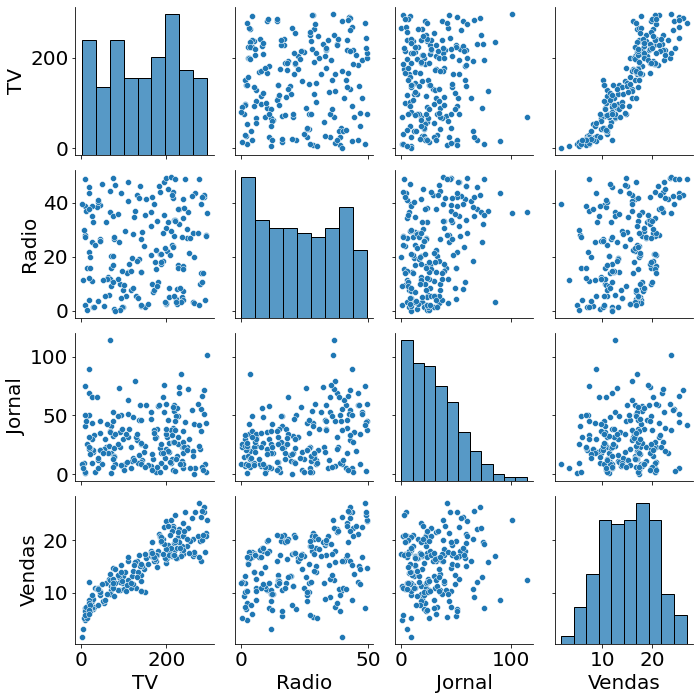

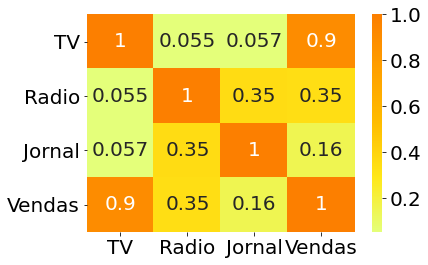

0.9406125321418688 0.9704489343801099
1.749750121883724 0.8706715833333347


,Vendas Reais,Previsão Random,Previsão Linear
0,8.4,9.378,8.651309
1,14.6,13.911,15.188738
2,6.7,6.894,7.030261
3,25.4,24.480,23.748993
4,13.2,12.911,14.085903
5,11.3,11.257,10.644157
6,20.9,18.857,18.164503
7,17.5,17.402,17.963400
8,12.3,11.485,11.461396
9,5.9,7.216,6.078525


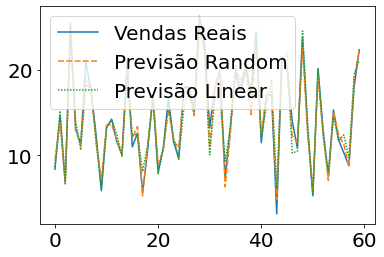


Tv,   Radio,   Jornal
[0.83181262 0.15124066 0.01694672]

TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64


<BarContainer object of 3 artists>

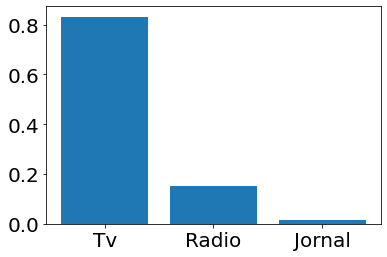

In [29]:
#obter dados
import pandas as pd

dados = pd.read_csv(r'/home/luan/Documentos/Python/inten 3/Aula 3-20210428T232017Z-001/advertising.csv')
display(dados)


#tratamento de dados
display(dados.info())


#análise exploratoria (distribuição e correlação entre itens)
import seaborn as sns 
import matplotlib.pyplot as plt

sns.pairplot(dados) # cria grafico 1
plt.show() # exibe grafico 1

sns.heatmap(dados.corr(), cmap = 'Wistia', annot = True) #cria grafico 2
plt.show() #exibe grafico 2


#modelagem (IA)
from sklearn.model_selection import train_test_split

x = dados.drop('Vendas', axis= 1)
y = dados['Vendas']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3)


#Regressão (linear, arvore de decisão)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear = LinearRegression() # cria regressão linear
randomforest = RandomForestRegressor() # cria modelo de arvore de decisão

linear.fit(x_treino, y_treino) # treina
randomforest.fit(x_treino, y_treino) # treina


#testando a IA com R² e erro quadratico médio
from sklearn import metrics
teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

r2_linear = metrics.r2_score(y_teste, teste_linear) # R²
r2_random = metrics.r2_score(y_teste, teste_random) # R²
print(r2_linear, r2_random)

erro_linear = metrics.mean_squared_error(y_teste, teste_linear) # erro
erro_random = metrics.mean_squared_error(y_teste, teste_random) # erro
print(erro_linear, erro_random)

#visualização gráfica
tabela_comparacao = pd.DataFrame()
tabela_comparacao['Vendas Reais'] = y_teste
tabela_comparacao['Previsão Random'] = teste_random
tabela_comparacao['Previsão Linear'] = teste_linear
tabela_comparacao = tabela_comparacao.reset_index(drop=True)
display(tabela_comparacao)

sns.lineplot(data=tabela_comparacao)
plt.show()

#qual a importancia de cada variavel para vendas
print()
print('Tv,   Radio,   Jornal')
print(randomforest.feature_importances_)
print()
#print(dados[['TV','Radio', 'Jornal']].sum())

#resultados
resultado = (dados[['TV', 'Radio', 'Jornal']].sum())
print(resultado)
informa = randomforest.feature_importances_
#plt.rcParams.update({'font.size': 20})
nome = ['Tv', 'Radio', 'Jornal']
plt.bar(nome, informa )

